In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import numpy as np
import datetime 
from datetime import timedelta
from datetime import timezone
import matplotlib as mpl
import warnings 



In [3]:
data = pd.read_csv('clean_data.csv')
data

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
2,2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
3,3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
4,4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012
420208,421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012
420209,421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012
420210,421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012


In [4]:
data.head(5)

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
2,2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
3,3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
4,4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010


In [5]:
data.shape

(420212, 24)

In [6]:
data['Store'].nunique()

45

In [7]:
data['Dept'].nunique()

81

In [8]:
data.loc[(data['Labor_Day'])&(data['Type']=='A')]

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
2216,2218,1,1,2010-09-10,18194.74,True,78.69,2.565,0.00,0.0,...,7.787,A,151315,False,True,False,False,36,9,2010
2217,2219,1,2,2010-09-10,45182.50,True,78.69,2.565,0.00,0.0,...,7.787,A,151315,False,True,False,False,36,9,2010
2218,2220,1,3,2010-09-10,12134.69,True,78.69,2.565,0.00,0.0,...,7.787,A,151315,False,True,False,False,36,9,2010
2219,2221,1,4,2010-09-10,36603.78,True,78.69,2.565,0.00,0.0,...,7.787,A,151315,False,True,False,False,36,9,2010
2220,2222,1,5,2010-09-10,17776.56,True,78.69,2.565,0.00,0.0,...,7.787,A,151315,False,True,False,False,36,9,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389322,390556,41,95,2012-09-07,106074.92,True,67.41,3.596,10220.45,22.8,...,6.432,A,196321,False,True,False,False,36,9,2012
389323,390557,41,96,2012-09-07,3923.92,True,67.41,3.596,10220.45,22.8,...,6.432,A,196321,False,True,False,False,36,9,2012
389324,390558,41,97,2012-09-07,24446.79,True,67.41,3.596,10220.45,22.8,...,6.432,A,196321,False,True,False,False,36,9,2012
389325,390559,41,98,2012-09-07,10520.72,True,67.41,3.596,10220.45,22.8,...,6.432,A,196321,False,True,False,False,36,9,2012


In [9]:
store_dept_table = pd.pivot_table(data,index='Store',columns='Dept',values='Weekly_Sales',aggfunc=np.mean)
store_dept_table

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4836.578944,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,517.552564
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1200.158451,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,417.101781,19340.693986,5985.671119,667.070315,31.609545,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,725.131261,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,420.477500,30.155385,NaN


In [10]:
data.loc[data['Weekly_Sales']<=0]

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year


In [11]:
data['Date'].head(5).append(data['Date'].tail(5))

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
420207    2012-10-26
420208    2012-10-26
420209    2012-10-26
420210    2012-10-26
420211    2012-10-26
Name: Date, dtype: object

### Inference:
#### * Our data is from feb 2010 to oct 2012

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

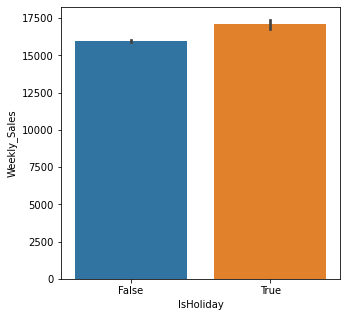

In [12]:
plt.figure(figsize=(5,5))
sns.barplot(x='IsHoliday',y='Weekly_Sales',data=data)

In [13]:
data_holiday = data.loc[data['IsHoliday']== True]
data_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [14]:
data.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

### Inference
#### * Avg weekly sales by types on Labor Day

In [15]:
data.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

In [16]:
data.sort_values(by='Weekly_Sales',ascending=False).head(10)

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
90456,90645,10,72,2010-11-26,693099.36,True,55.33,3.162,0.00,0.0,...,9.003,B,126512,False,False,True,False,47,11,2010
336013,337053,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,0.0,...,8.745,B,103681,False,False,True,False,47,11,2011
94183,94393,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,...,7.874,B,126512,False,False,True,False,47,11,2011
332592,333594,35,72,2010-11-26,627962.93,True,46.67,3.039,0.00,0.0,...,8.763,B,103681,False,False,True,False,47,11,2010
130769,131088,14,72,2010-11-26,474330.10,True,46.15,3.039,0.00,0.0,...,8.724,A,200898,False,False,True,False,47,11,2010
189789,190370,20,72,2010-11-26,422306.25,True,46.66,3.039,0.00,0.0,...,7.484,A,203742,False,False,True,False,47,11,2010
258999,259799,27,72,2010-11-26,420586.57,True,46.67,3.186,0.00,0.0,...,8.021,A,204184,False,False,True,False,47,11,2010
90696,90886,10,7,2010-12-24,406988.63,False,57.06,3.236,0.00,0.0,...,9.003,B,126512,False,False,False,False,51,12,2010
90746,90936,10,72,2010-12-24,404245.03,False,57.06,3.236,0.00,0.0,...,9.003,B,126512,False,False,False,False,51,12,2010
209371,210037,22,72,2010-11-26,393705.20,True,44.61,3.070,0.00,0.0,...,8.572,B,119557,False,False,True,False,47,11,2010


### Inference
#### * The top 5 sales are on thanksgiving only

In [17]:
data.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

In [18]:
data.groupby(['IsHoliday','Type'])['Weekly_Sales'].mean()

IsHoliday  Type
False      A       20058.212098
           B       12204.870740
           C        9548.251972
True       A       21332.892028
           B       13423.406047
           C        9565.533649
Name: Weekly_Sales, dtype: float64

### Inference 
#### * The average weekly sales is higher on holidays(especially in Type A)

## To sort and check Null values



In [19]:
data.isna().sum()

Unnamed: 0      0
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
week            0
month           0
year            0
dtype: int64

### If there are any Null values we can fill them will '0' 

In [20]:
data = data.fillna(0)

In [21]:
data.isna().sum()

Unnamed: 0      0
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
week            0
month           0
year            0
dtype: int64

In [22]:
data.describe()

,Unnamed: 0,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,210736.390089,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787,25.828408,6.449866,2010.968454
std,121715.773081,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568,14.152489,3.243397,0.796898
min,0.000000,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000,1.000000,2010.000000
25%,105299.750000,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,14.000000,4.000000,2010.000000
50%,210775.500000,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000,26.000000,6.000000,2011.000000
75%,316116.250000,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000,38.000000,9.000000,2012.000000
max,421569.000000,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,52.000000,12.000000,2012.000000


### For a scatter plot


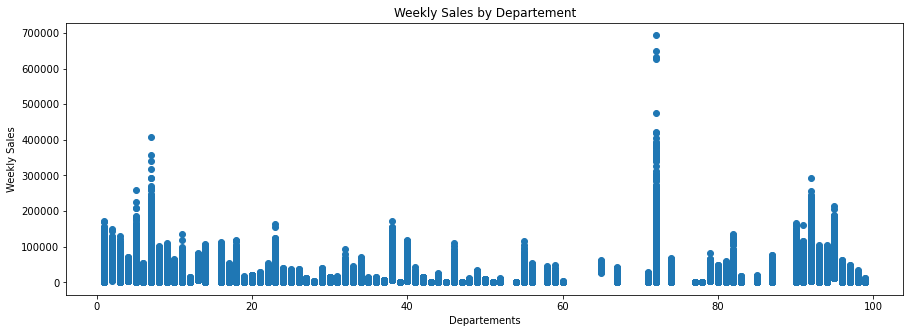

In [23]:
x = data['Dept']
y = data['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Departement')
plt.xlabel('Departements')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

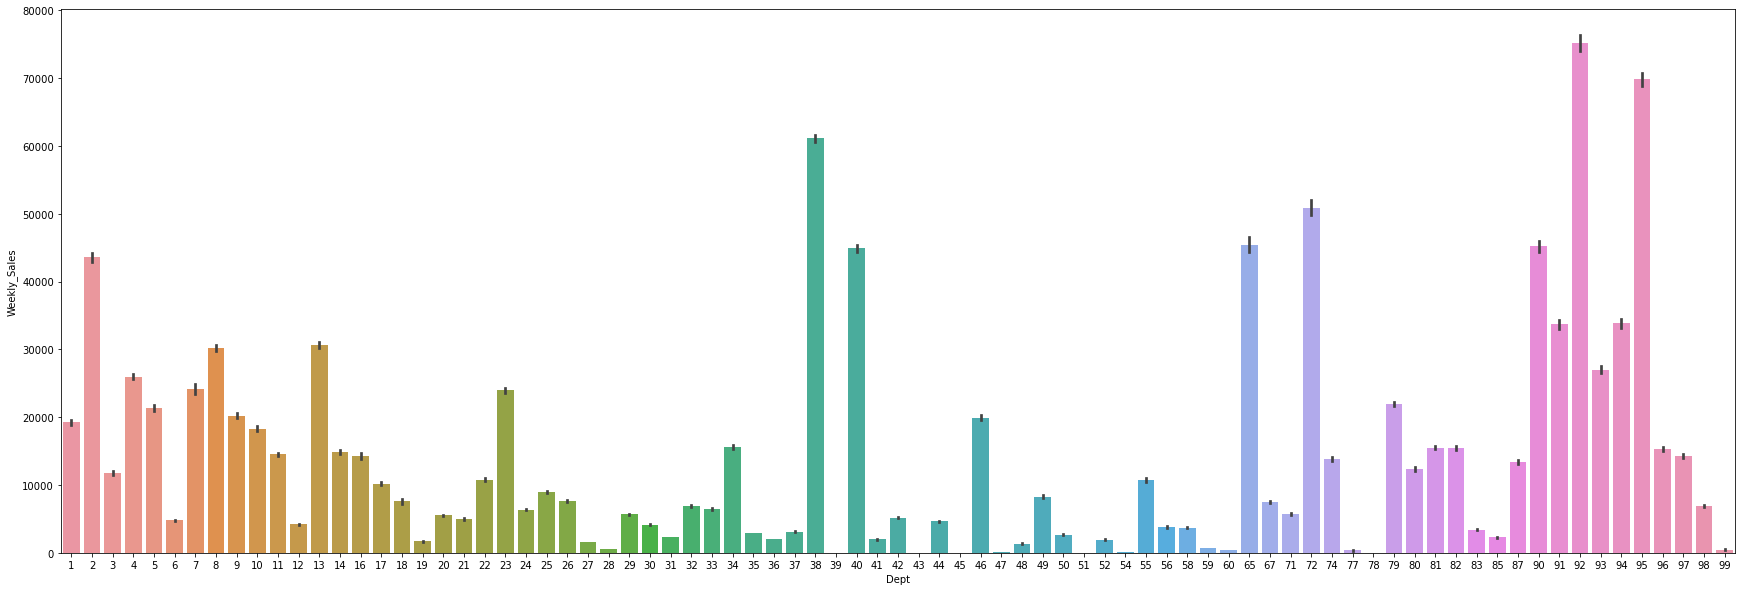

In [24]:
plt.figure(figsize=(30,10))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)

### * Inference
#### From the first graph,dept 72 has higher weekly sales.
#### but when we take averages wkt dept 92 has the highest sales weekly

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


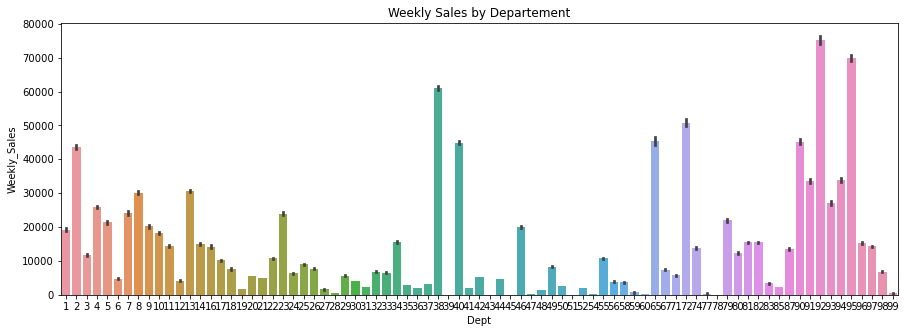

In [25]:
x = data['Dept']
y = data['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Departement')
plt.xlabel('Departements')
plt.ylabel('Weekly Sales')
sns.barplot(x,y,data=data)
plt.show()

In [26]:
data

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
2,2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
3,3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
4,4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012
420208,421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012
420209,421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012
420210,421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012


In [27]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [28]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,False,False,False,False,43,10,2012
420208,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,False,False,False,False,43,10,2012
420209,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,False,False,False,False,43,10,2012
420210,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,False,False,False,False,43,10,2012


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Date          420212 non-null  object 
 3   Weekly_Sales  420212 non-null  float64
 4   IsHoliday     420212 non-null  bool   
 5   Temperature   420212 non-null  float64
 6   Fuel_Price    420212 non-null  float64
 7   MarkDown1     420212 non-null  float64
 8   MarkDown2     420212 non-null  float64
 9   MarkDown3     420212 non-null  float64
 10  MarkDown4     420212 non-null  float64
 11  MarkDown5     420212 non-null  float64
 12  CPI           420212 non-null  float64
 13  Unemployment  420212 non-null  float64
 14  Type          420212 non-null  object 
 15  Size          420212 non-null  int64  
 16  Super_Bowl    420212 non-null  bool   
 17  Labor_Day     420212 non-null  bool   
 18  Than

In [30]:
data['Date'] = pd.to_datetime(data['Date'])
data['week'] = data['Date'].dt.week
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year


/var/folders/6v/jd1m090n7m322nvh1vy2fbjh0000gp/T/ipykernel_5189/2247455644.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['week'] = data['Date'].dt.week


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  bool          
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     420212 non-null  float64       
 8   MarkDown2     420212 non-null  float64       
 9   MarkDown3     420212 non-null  float64       
 10  MarkDown4     420212 non-null  float64       
 11  MarkDown5     420212 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Type          420212 non-null  object        
 15  Size          420

In [32]:
data.groupby(['month'])['Weekly_Sales'].mean()

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [33]:
data.groupby(['year'])['Weekly_Sales'].mean().sort_values(ascending=False)

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='month'>

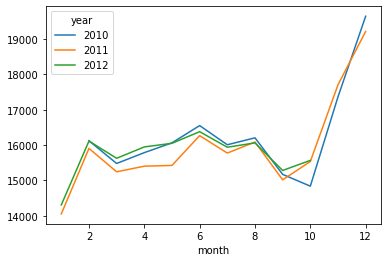

In [34]:
monthly_sales = pd.pivot_table(data=data,values='Weekly_Sales',columns='year',index='month')
monthly_sales.plot()

### * Inference
#### From the graph, it is seen that 2011 has lower sales than 2010 generally. When we look at the mean sales it is seen that 2010 has higher values, but 2012 has no information about November and December which have higher sales. Despite of 2012 has no last two months sales, it's mean is near to 2010. Most probably, it will take the first place if we get 2012 results and add them.

<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

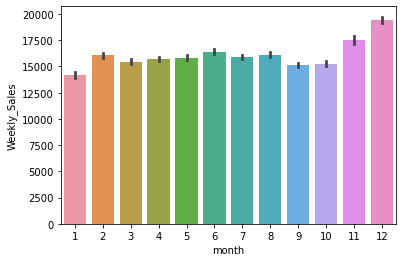

In [35]:
sns.barplot(x='month',y='Weekly_Sales',data=data)

In [36]:
data.groupby(['week'])['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='week'>

<Figure size 1800x3600 with 0 Axes>

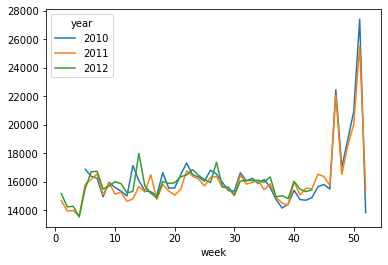

In [37]:
plt.figure(figsize=(25,50))
weekly_sales = pd.pivot_table(data=data,values='Weekly_Sales',columns='year',index='week')
weekly_sales.plot()


<AxesSubplot:xlabel='week', ylabel='Weekly_Sales'>

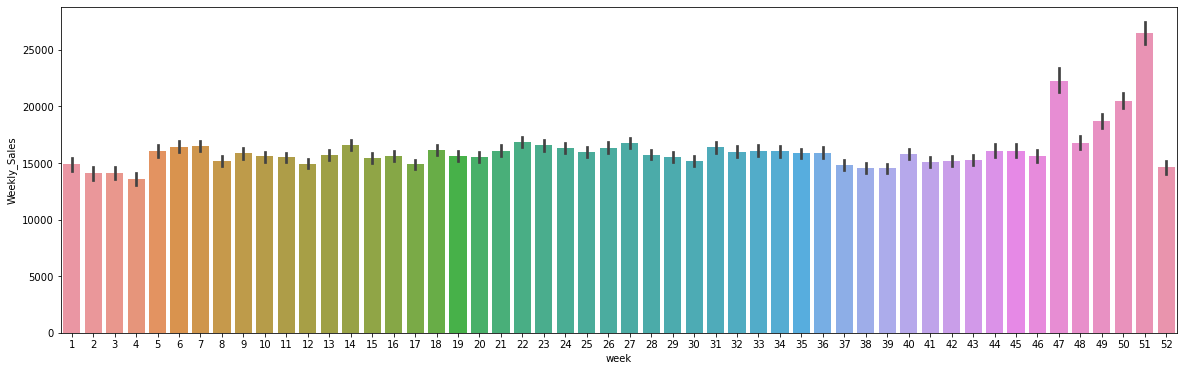

In [38]:
plt.figure(figsize=(20,6))
sns.barplot(x='week',y='Weekly_Sales',data=data)

### * Inference
#### From graphs, it is seen that 51th week and 47th weeks have significantly higher averages as Christmas, Thankgiving and Black Friday effects.

### Encoding the Data



In [39]:
data_encoded = data.copy()


In [40]:
type_group = {'A':1, 'B':2, 'C':3}# changing A,B,C to 123
data_encoded['Type'] = data_encoded['Type'].replace(type_group)

In [41]:
data_encoded['Super_Bowl'] = data_encoded['Super_Bowl'].astype(bool).astype(int)

In [42]:
data_encoded['Thanksgiving'] = data_encoded['Thanksgiving'].astype(bool).astype(int)

In [43]:
data_encoded['Labor_Day'] = data_encoded['Labor_Day'].astype(bool).astype(int)

In [44]:
data_encoded['Christmas'] = data_encoded['Christmas'].astype(bool).astype(int)

In [45]:
data_encoded['IsHoliday'] = data_encoded['IsHoliday'].astype(bool).astype(int)

In [46]:
data_new = data_encoded.copy()
data_new

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.0,...,8.106,1,151315,0,0,0,0,5,2,2010
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.00,0.00,0.0,...,8.106,1,151315,0,0,0,0,5,2,2010
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.00,0.00,0.0,...,8.106,1,151315,0,0,0,0,5,2,2010
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.00,0.00,0.0,...,8.106,1,151315,0,0,0,0,5,2,2010
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.00,0.00,0.0,...,8.106,1,151315,0,0,0,0,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,...,8.667,2,118221,0,0,0,0,43,10,2012
420208,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,...,8.667,2,118221,0,0,0,0,43,10,2012
420209,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,...,8.667,2,118221,0,0,0,0,43,10,2012
420210,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,...,8.667,2,118221,0,0,0,0,43,10,2012


In [47]:
data_new['Size'].unique()

array([151315, 202307,  37392, 205863,  34875, 202505,  70713, 155078,
       125833, 126512, 207499, 112238, 219622, 200898, 123737,  57197,
        93188, 120653, 203819, 203742, 140167, 119557, 114533, 128107,
       152513, 204184, 206302,  93638,  42988, 203750, 203007,  39690,
       158114, 103681,  39910, 184109, 155083, 196321,  41062, 118221])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


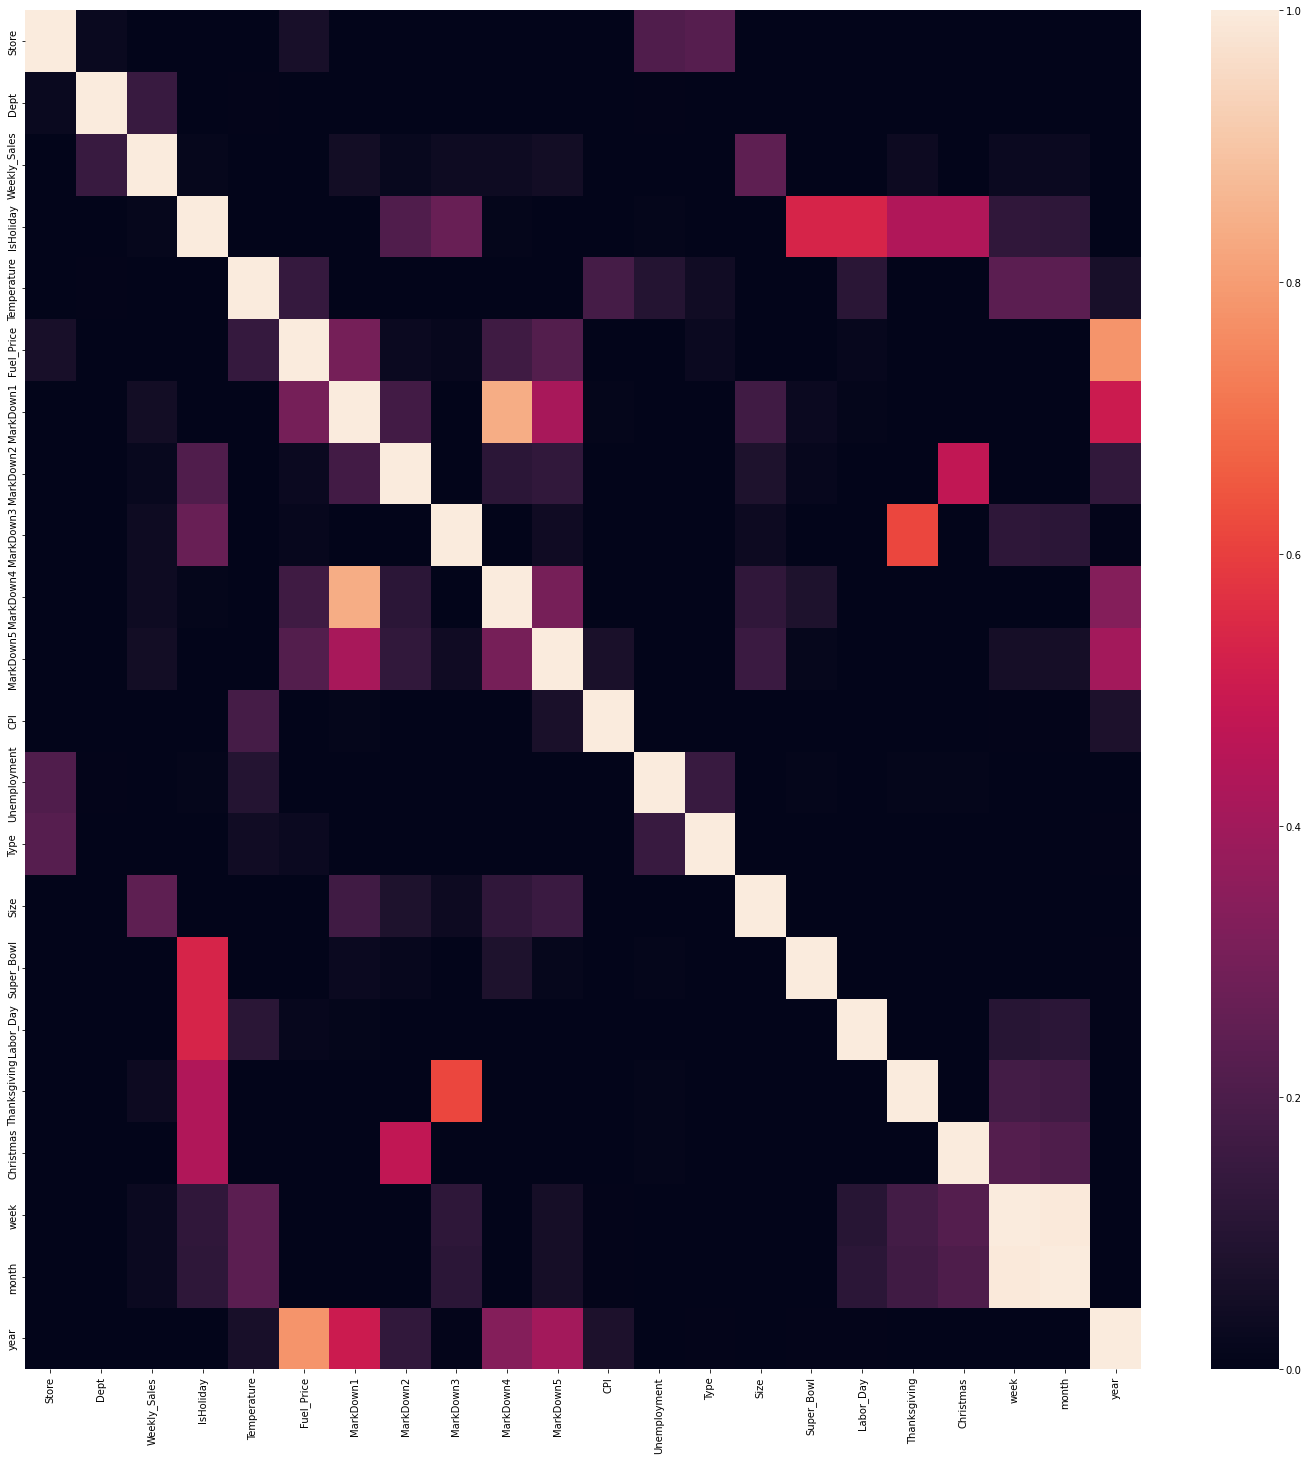

In [48]:
plt.figure(figsize=(25,25))
sns.heatmap(data_new.corr(),abs(0))
plt.show()